# Elon Musk's Tweets Data Analysis

In [1]:
# Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt

#from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc


In [2]:
tweets_df = pd.read_csv("TweetsElonMusk.csv")


# 1. About the Data Set

In [3]:
tweets_df.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


* How many tweets are in this dataset?

In [4]:
tweets_df.shape

(12562, 36)

# 2. Exploratory Data Analysis on the dataset

In [5]:
tweets_df.index

RangeIndex(start=0, stop=12562, step=1)

In [6]:
tweets_df.describe()

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.256200e+04,1.256200e+04,12562.0,12562.0,0.0,12562.000000,12562.000000,1.256200e+04,12562.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.049919e+18,1.047490e+18,300.0,44196397.0,NaN,679.370005,2256.727193,2.147006e+04,0.063047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.761981e+17,2.783202e+17,0.0,0.0,NaN,2453.853763,9793.382524,6.727787e+04,0.243058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.543473e+10,1.659576e+09,300.0,44196397.0,NaN,0.000000,0.000000,2.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.444958e+17,9.413883e+17,300.0,44196397.0,NaN,45.000000,45.000000,8.790000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.117568e+18,1.117117e+18,300.0,44196397.0,NaN,113.000000,144.500000,2.439500e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.255896e+18,1.254922e+18,300.0,44196397.0,NaN,373.000000,847.750000,1.128250e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.383296e+18,1.383296e+18,300.0,44196397.0,NaN,61349.000000,361461.000000,1.593425e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

* Drop columns that have all entries are null

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

In [9]:
tweets_df.isnull().any()

id                 False
conversation_id    False
created_at         False
date               False
time               False
timezone           False
user_id            False
username           False
name               False
place               True
tweet              False
language           False
mentions           False
urls               False
photos             False
replies_count      False
retweets_count     False
likes_count        False
hashtags           False
cashtags           False
link               False
retweet            False
quote_url           True
video              False
thumbnail           True
near                True
geo                 True
source              True
user_rt_id          True
user_rt             True
retweet_id          True
reply_to           False
retweet_date        True
translate           True
trans_src           True
trans_dest          True
dtype: bool

In [10]:
tweets_df.count()

id                 12562
conversation_id    12562
created_at         12562
date               12562
time               12562
timezone           12562
user_id            12562
username           12562
name               12562
place                  0
tweet              12562
language           12562
mentions           12562
urls               12562
photos             12562
replies_count      12562
retweets_count     12562
likes_count        12562
hashtags           12562
cashtags           12562
link               12562
retweet            12562
quote_url            410
video              12562
thumbnail            792
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to           12562
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

In [11]:
tweets = tweets_df.drop(['place','quote_url', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id','retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis =1)

In [12]:
tweets.shape

(12562, 23)

* The date of his first and last post in this data set?

In [13]:
date_sort = tweets.sort_values(by = "created_at", ascending = True)
date_sort['created_at']

12514    2010-06-04 21:31:57 EEST
12513     2011-12-01 11:55:11 EET
12512     2011-12-01 12:29:04 EET
12511     2011-12-03 10:20:28 EET
12510     2011-12-03 10:22:07 EET
                   ...           
12519    2021-04-17 04:37:48 EEST
12518    2021-04-17 07:16:45 EEST
12517    2021-04-17 07:46:34 EEST
12516    2021-04-17 07:51:09 EEST
12515    2021-04-17 08:46:56 EEST
Name: created_at, Length: 12562, dtype: object

In [14]:
print("First tweet was made on ",date_sort['created_at'][12514])

First tweet was made on  2010-06-04 21:31:57 EEST


In [15]:
first_tweet = date_sort['created_at'][12514]
Tweet = date_sort.loc[date_sort['created_at'] == first_tweet, 'tweet'].iloc[0]
print("Elon Musk's first tweet was in this data set- ' ",Tweet, "Posted on - ", first_tweet )

Elon Musk's first tweet was in this data set- '  Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me. Posted on -  2010-06-04 21:31:57 EEST


In [16]:
date_sort = tweets.sort_values(by = "created_at", ascending = False)
date_sort['created_at']

12515    2021-04-17 08:46:56 EEST
12516    2021-04-17 07:51:09 EEST
12517    2021-04-17 07:46:34 EEST
12518    2021-04-17 07:16:45 EEST
12519    2021-04-17 04:37:48 EEST
                   ...           
12510     2011-12-03 10:22:07 EET
12511     2011-12-03 10:20:28 EET
12512     2011-12-01 12:29:04 EET
12513     2011-12-01 11:55:11 EET
12514    2010-06-04 21:31:57 EEST
Name: created_at, Length: 12562, dtype: object

In [17]:
print("Last tweet was made in this data set on ",date_sort['created_at'][12515])

Last tweet was made in this data set on  2021-04-17 08:46:56 EEST


In [18]:
last_tweet = date_sort['created_at'][12515]
Tweet = date_sort.loc[date_sort['created_at'] == last_tweet, 'tweet'].iloc[0]
print("Elon Musk's last tweet in this data set was - ' ",Tweet, "Posted on - ", last_tweet )

Elon Musk's last tweet in this data set was - '  Dragon spacecraft &amp; Falcon 9 rocket  https://t.co/A6fsNlsN9z Posted on -  2021-04-17 08:46:56 EEST


* His most liked tweet, what was it about?

In [19]:
tweets["likes_count"].sort_values(ascending=False)

3694     1593425
7595     1202081
528      1003772
716       931237
164       902515
          ...   
12020          3
12290          2
12393          2
12413          2
12430          2
Name: likes_count, Length: 12562, dtype: int64

In [20]:
tweets.iloc[3694]

id                                               1236029449042198528
conversation_id                                  1236029449042198528
created_at                                   2020-03-06 22:42:39 EET
date                                                      2020-03-06
time                                                        22:42:39
timezone                                                         300
user_id                                                     44196397
username                                                    elonmusk
name                                                       Elon Musk
tweet                                  The coronavirus panic is dumb
language                                                          en
mentions                                                          []
urls                                                              []
photos                                                            []
replies_count                     

In [21]:
tweets.iloc[3694]["tweet"]

'The coronavirus panic is dumb'

* His least liked tweet, what was it about?

In [22]:
tweets["likes_count"].sort_values()

12413          2
12393          2
12290          2
12430          2
12434          3
          ...   
164       902515
716       931237
528      1003772
7595     1202081
3694     1593425
Name: likes_count, Length: 12562, dtype: int64

In [23]:
tweets["likes_count"].sort_values().head()

12413    2
12393    2
12290    2
12430    2
12434    3
Name: likes_count, dtype: int64

In [24]:
tweets.iloc[12413]["tweet"]

'@LooperNor Yes, this will, if all goes well, be the first commercial spaceship to dock with the Space Station. T zero ~ end of April.'

* What are the least and most number of likes in a form of plots?

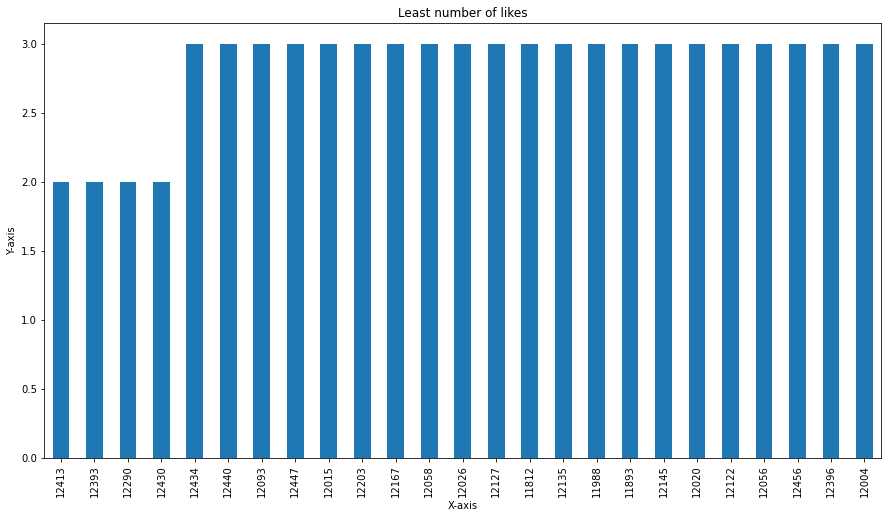

In [25]:
sorted_df = tweets.sort_values(by = "likes_count", ascending = True)
sorted_df['likes_count'].head(25).plot(kind = 'bar', figsize = (15,8), title = "Least number of likes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

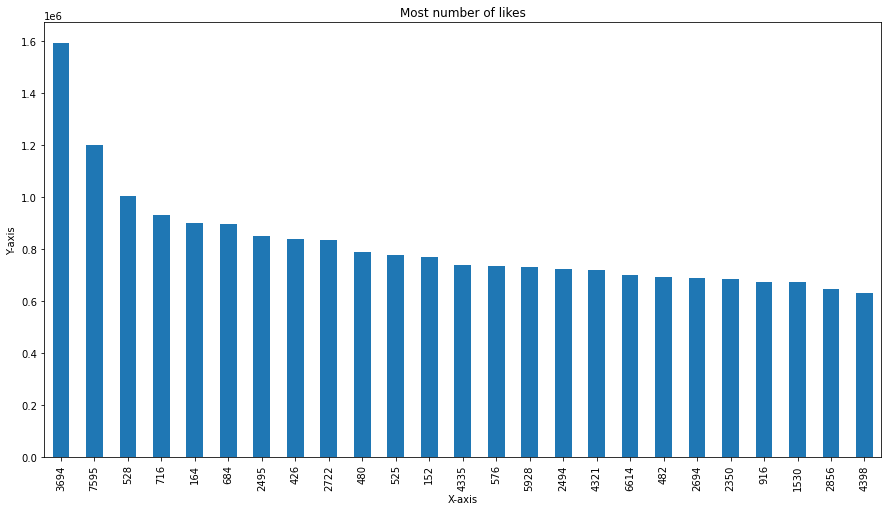

In [26]:
sorted_df = tweets.sort_values(by = "likes_count", ascending = False)
sorted_df['likes_count'].head(25).plot(kind = 'bar', figsize = (15,8), title = "Most number of likes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [27]:
import re
import os
import string
def emoji_extractor(string, remove=False):
    '''Removes Emoji from a text.'''
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    if remove == False:
        # Extract emoji
        return emoji_pattern.findall(string)
    else:
        # Remove emoji from text
        return emoji_pattern.sub(r'', string)
    


In [28]:
def clean_tweets(df):
    '''Returns the dataframe with the tweet column cleaned.'''
    
    # ----- Remove \n, \t, \xa0 -----
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\xa0', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ''))
    
    # ----- Remove pic.twitter and http:// + https:// links -----
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'https\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'pic.twitter\S+', '', x))
    
    # ----- Remove mentions and hashtags -----
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'#\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'@\S+', '', x))
    
    # ----- Extract Emojis and Remove from Tweet -----
    df['tweet_emojis'] = df['tweet'].apply(lambda x: emoji_extractor(x, remove=False))
    df['tweet_emojis'].replace('', np.nan, inplace=True)
#     df["tweet_emojis"] = df["tweet_emojis"].apply(lambda x: clean_emoji(x))
    
    df['tweet'] = df['tweet'].apply(lambda x: emoji_extractor(x, remove=True))
    
    # ----- Strip of whitespaces -----
    df['tweet'] = df['tweet'].apply(lambda x: x.strip())
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.split()))
    
    # ----- Remove punctuation & Make lowercase -----
    df['tweet'] = df['tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df['tweet'] = df['tweet'].apply(lambda x: x.lower())
    
    return df

In [29]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')

In [30]:
tweets = tweets[["id", "date", "time", "username", 
                 "tweet", "mentions", "urls", "photos", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link"]]

# Create new features
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])
# Clean Tweets
tweets = clean_tweets(tweets)


# Elon Musk's personality


* Let's see how his tweets look, his tweets progression over time and get an overall feel of how, what, when he tweets.
This will help us understand about his behavior, as well as address and analyse the tweets that mention Bitcoin.

Text(0, 0.5, 'Frequency')

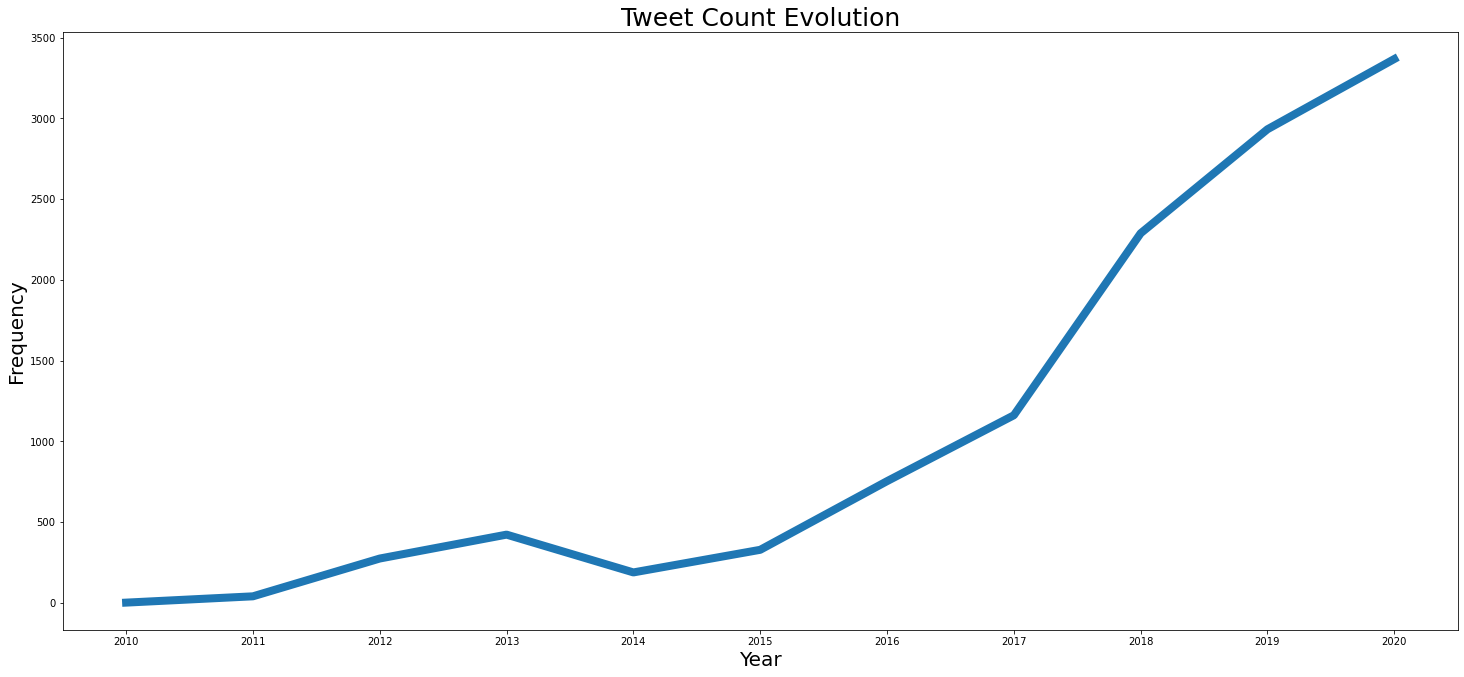

In [31]:
# Yearly evolution
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8)

#ay =sns.lineplot()
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

# * We want to explore more about his personality. We want to plot his like counts, retweets count and replies counts 

In [32]:
def show_values_on_bars(axs, h_v="v", space=1):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        


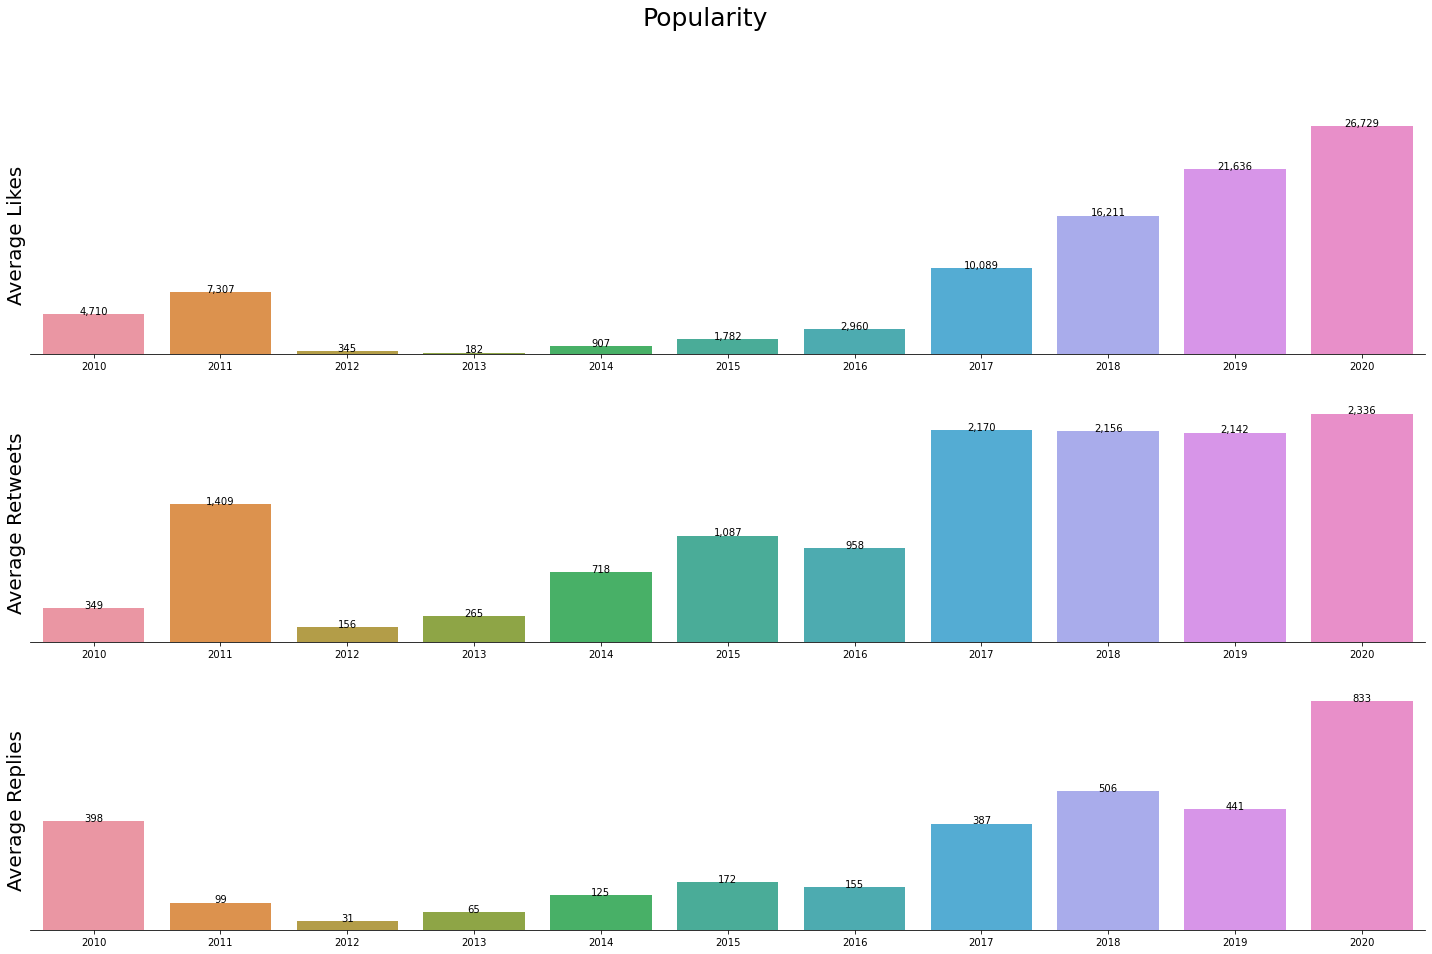

In [33]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=5, ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=5,  ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=5,  ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
    show_values_on_bars(axs=ax, h_v="v", space=0.4)
sns.despine(left=True);

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

import warnings
warnings.simplefilter("ignore")
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

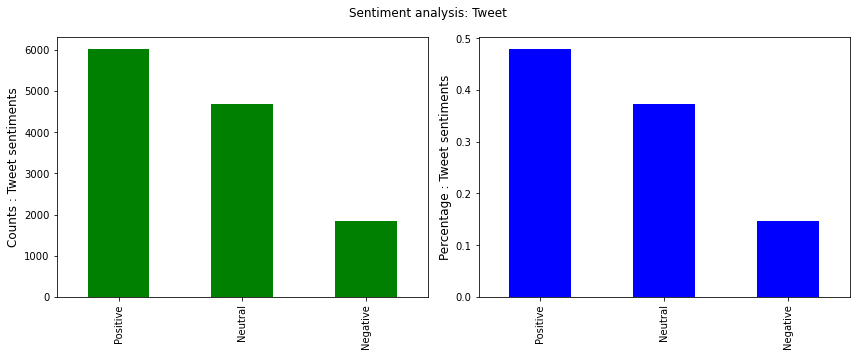

In [36]:
tweets['text_sentiment'] = tweets['tweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets, 'text_sentiment', 'Tweet')

From this we can conclude that Elon Musk is a optimistic person.

In [62]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

# Most Frequent Words

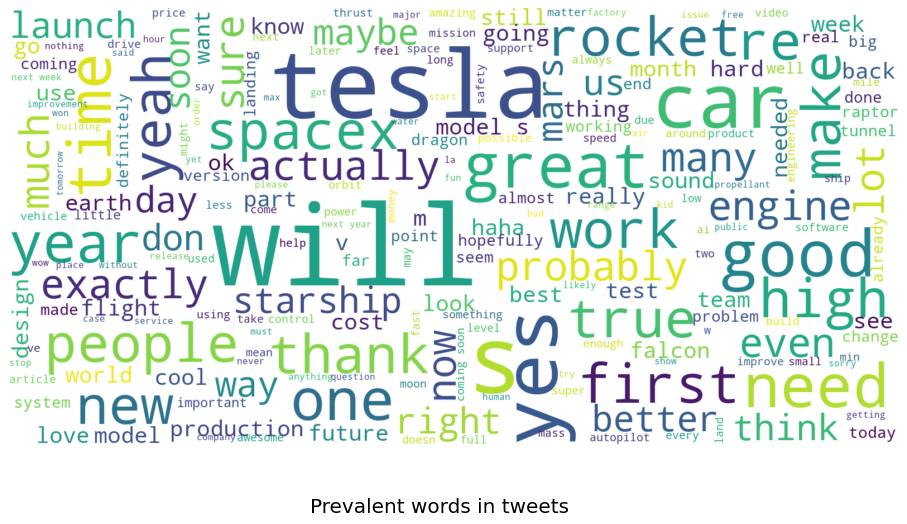

In [63]:
show_wordcloud(tweets['tweet'], title = 'Prevalent words in tweets')

Note: A lot of talk about Tesla, rocket, Mars, starship, launch. Words he uses is super positive: yes, yeah, good, thank, people, sure. He's always super positive and enthusiastic in his messages.

In [39]:
# Retrieve Bitcoin Information
bitcoin_tweets = tweets[tweets["tweet"].str.contains("bitcoin")].reset_index(drop = True)

bitcoin_tweets['tweet'].head(10)


0    pay by bitcoin capability available outside us...
1    tesla is using only internal amp open source s...
2                 you can now buy a tesla with bitcoin
3    btc bitcoin is an anagram of tbcthe boring com...
4    to be clear i am not an investor i am an engin...
5    tesla’s action is not directly reflective of m...
6                bitcoin is almost as bs as fiat money
7                              bitcoin is my safe word
8                         toss a bitcoin to ur witcher
9                    i still only own 025 bitcoins btw
Name: tweet, dtype: object

In [40]:
# Retrieve only dogecoin Information
dogecoin_tweets = tweets[tweets["tweet"].str.contains("dogecoin")].reset_index(drop = True)

dogecoin_tweets['tweet'].head(10)


0    spacex is going to put a literal dogecoin on t...
1    origin of doge day afternoon the ancient roman...
2                                2022 dogecoin is dumb
3    if major dogecoin holders sell most of their c...
4    bought some dogecoin for lil x so he can be a ...
5                      dogecoin is the people’s crypto
6                                        dogecoin mode
7                              dogecoin value may vary
8                                        dogecoin rulz
9    dogecoin might be my fav cryptocurrency it’s p...
Name: tweet, dtype: object

In [41]:
# === Dogecoin ===
dogecoin = pd.read_csv("DOGE-USD.csv")

# Is there correlation between Dogecoin and Elon Musk's Tweets?

In [42]:
dogecoin .head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0


In [43]:
dogecoin .columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [44]:
dogecoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [45]:
dogecoin .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [46]:
print("Total records",dogecoin.shape)
print("Data types of data columns\n",dogecoin.dtypes)

Total records (1761, 7)
Data types of data columns
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [47]:
dogecoin['Date'] =  pd.to_datetime(dogecoin['Date'],infer_datetime_format=True,format='%y-%m-%d')
dogecoin.sort_values(by='Date',inplace=True)
dogecoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [48]:
dogecoin.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN
1760,2022-09-04,0.062682,0.062744,0.062667,0.062696,0.062696,297513408.0


# Missing Values. Let's drop the records with NA value, to make sure it does not cloud our analysis

In [49]:
prev_len=dogecoin.shape[0]
print("Total records=",dogecoin.shape[0])
print("Total records with missing values=",dogecoin.isna().sum().sum())
data=dogecoin.dropna()
print("Total records after the removal of NA values", data.shape[0])
print("Removed records",prev_len-data.shape[0])
print("Removed records percentage:", round(((prev_len-data.shape[0])/prev_len)*100,2))

Total records= 1761
Total records with missing values= 6
Total records after the removal of NA values 1760
Removed records 1
Removed records percentage: 0.06


# Analyze dogecoin Evolution

1. spacex is going to put a literal dogecoin on the literal moon
2. origin of doge day afternoon the ancient romans sacrificed a dogecoin at the beginning of the doge days to appease the rage of sirius believing that the star was the cause of the hot sultry weather
3. 2022 dogecoin is dumb
4. if major dogecoin holders sell most of their coins it will get my full support too much concentration is the only real issue imo
5. bought some dogecoin for lil x so he can be a toddler hodler
6. dogecoin is the people’s crypto
7. dogecoin mode
8. dogecoin value may vary
9. dogecoin rulz
10. dogecoin might be my fav cryptocurrency it’s pretty cool


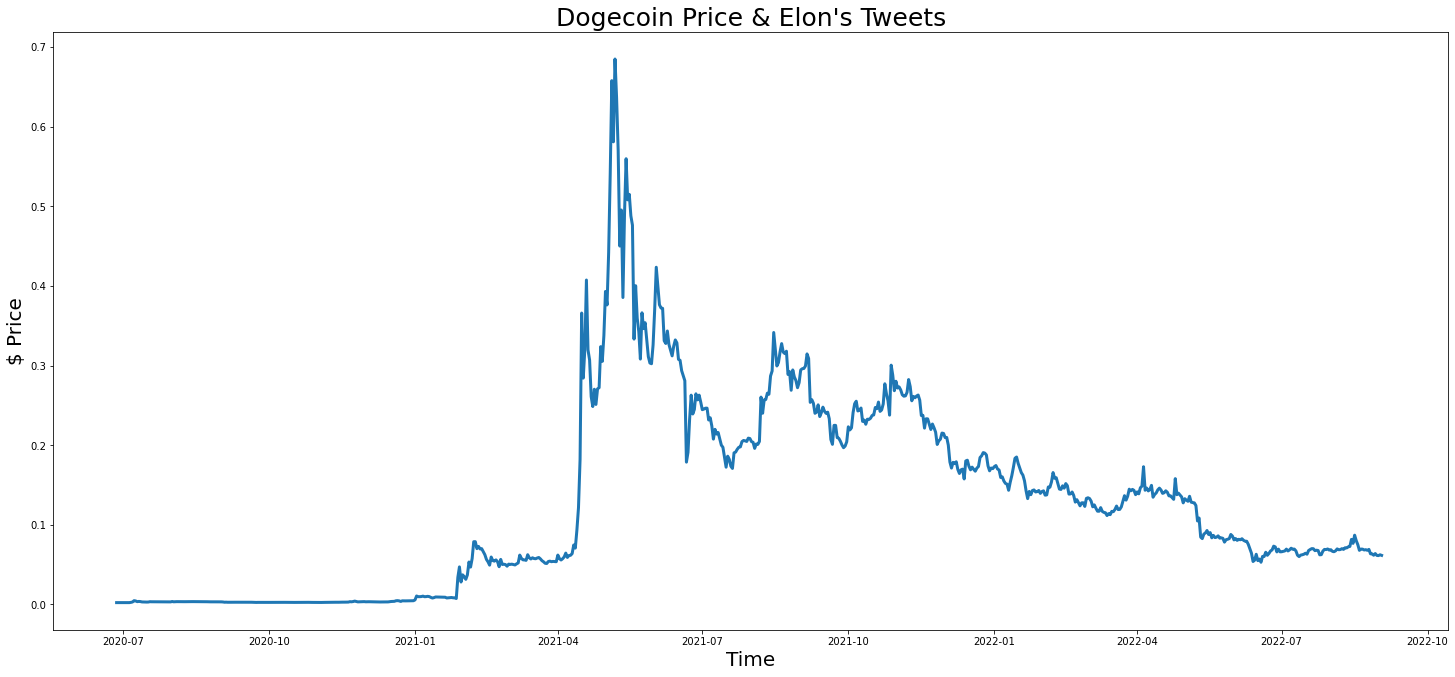

In [50]:
from datetime import datetime
# Get dogecoin info
dgc_tweets = tweets[tweets["tweet"].str.contains("dogecoin")].reset_index(drop = True)
# Convert date to number
dgc_tweets["date"] = dgc_tweets["date"].apply(lambda x: datetime.fromisoformat(x).timestamp())
timestamps = dgc_tweets["date"]

dgc_prices = dogecoin.sort_values("Date", ascending=False).head(800)
dgc_prices["Date"] = dgc_prices["Date"]
#dgc_prices["Date"] = dgc_prices["Date"].apply(lambda x: datetime.fromisoformat(x).timestamp())

for k, tweet in enumerate(dgc_tweets["tweet"]): print(f"{k+1}.", tweet)

# Get intersection
x_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Date"]
y_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Adj Close"]

# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)
plt.plot(dgc_prices["Date"], dgc_prices["Adj Close"], lw=3, zorder=1)
plt.title("Dogecoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);

1. spacex is going to put a literal dogecoin on the literal moon
2. origin of doge day afternoon the ancient romans sacrificed a dogecoin at the beginning of the doge days to appease the rage of sirius believing that the star was the cause of the hot sultry weather
3. 2022 dogecoin is dumb
4. if major dogecoin holders sell most of their coins it will get my full support too much concentration is the only real issue imo
5. bought some dogecoin for lil x so he can be a toddler hodler
6. dogecoin is the people’s crypto


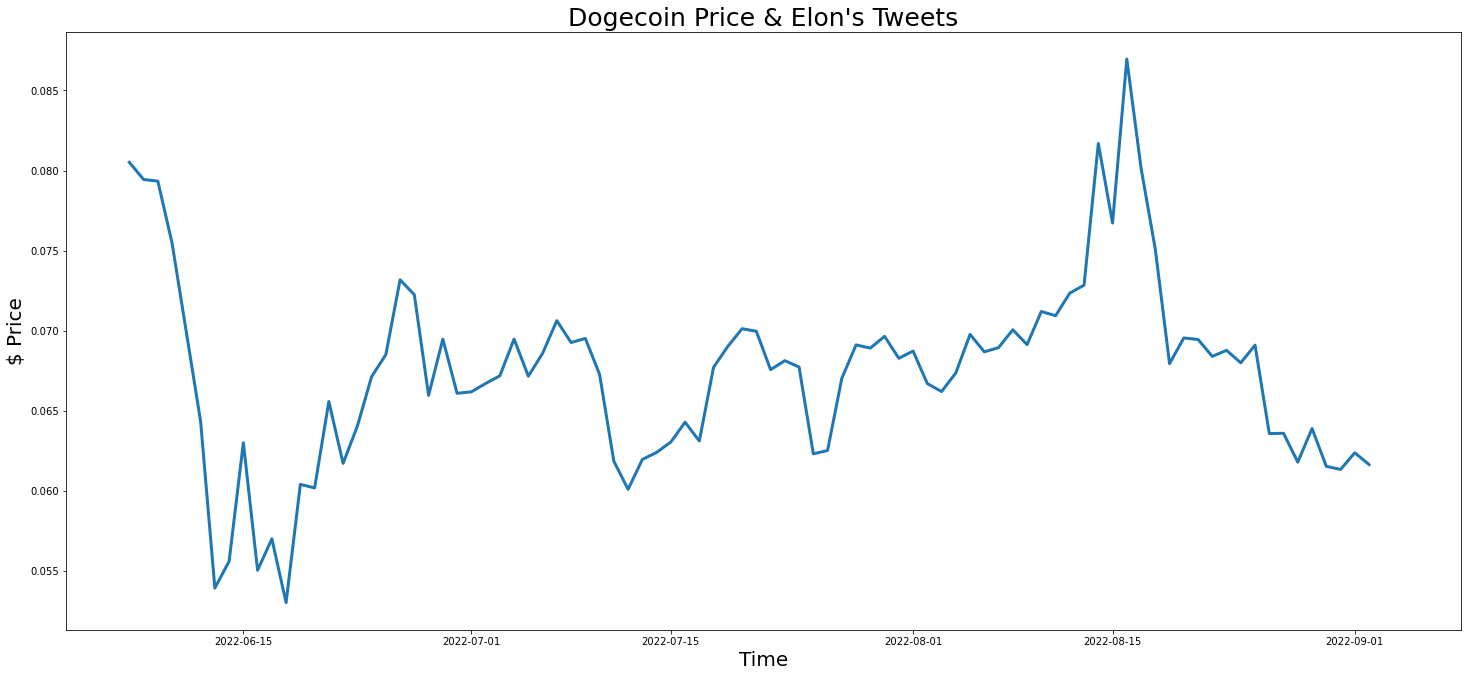

In [51]:
dgc_tweets = tweets[tweets["tweet"].str.contains("dogecoin")].reset_index(drop = True)
# Convert date to number
dgc_tweets["date"] = dgc_tweets["date"].apply(lambda x: datetime.fromisoformat(x).timestamp())
timestamps = dgc_tweets["date"]

dgc_prices = dogecoin.sort_values("Date", ascending=False).head(90)
dgc_prices["Date"] = dgc_prices["Date"]
#dgc_prices["Date"] = dgc_prices["Date"].apply(lambda x: datetime.fromisoformat(x).timestamp())

for k, tweet in enumerate(dgc_tweets["tweet"][:6]): print(f"{k+1}.", tweet)

# Get intersection
x_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Date"]
y_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Adj Close"]

# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)
plt.plot(dgc_prices["Date"], dgc_prices["Adj Close"], lw=3, zorder=1)
plt.title("Dogecoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);

# Let's Visualize the distribution of the key variables like Opening price, Highest price, Lowest price and Closing price in Dogecoin

In [52]:
def plot(x, title,c):

    sns.distplot(x,color=c)

    plt.tight_layout(pad=3.0)
    plt.show()

In [53]:
custom_colors = ["#4e89ae"]

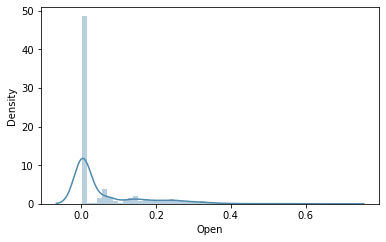

In [54]:
plot(data['Open'],'Distribution of Opening Price(in dollars)',custom_colors[0])

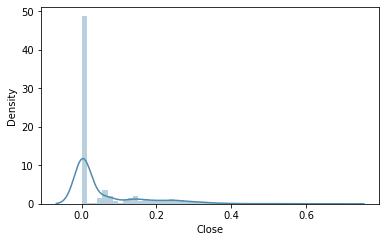

In [55]:
plot(data['Close'],'Distribution of Closing Price(in dollars)',custom_colors[0])

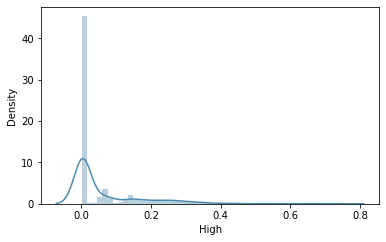

In [56]:
plot(data['High'],'Distribution of Highest Price(in dollars)',custom_colors[0])

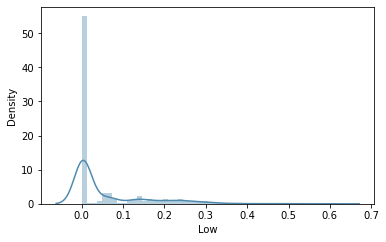

In [57]:
plot(data['Low'],'Distribution of Lowest Price(in dollars)',custom_colors[0])

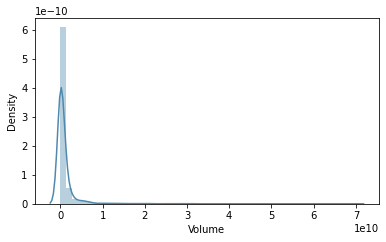

In [58]:
plot(data['Volume'],'Distribution of Volume',custom_colors[0])

# Correlation Analysis

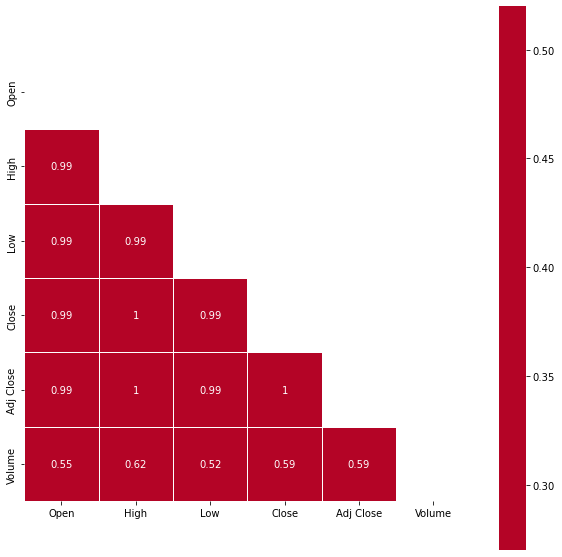

In [59]:
plt.figure(figsize=(10,10))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

# Analyze time series data for dogecoin